In [1]:
import os
batch_files = os.listdir('predictions/')
batch_files = sorted(batch_files, key=lambda x: int(x.split('.')[0]))

In [2]:
import joblib
import numpy as np

features = None
for batch_file in batch_files:
    batch = joblib.load(os.path.join('predictions', batch_file))
    if features is not None:
        features = np.vstack((features, batch['prediction']))
    else:
        features = batch['prediction']

In [3]:
features.shape

(7936, 512)

In [4]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
features = standard_scaler.fit_transform(features)

In [5]:
from sklearn.cluster import KMeans

def find_cluster(data, n_clusters):
    for n in range(2, n_clusters):
        model = KMeans(n_clusters=n)
        model.fit(data)
        yield model.inertia_

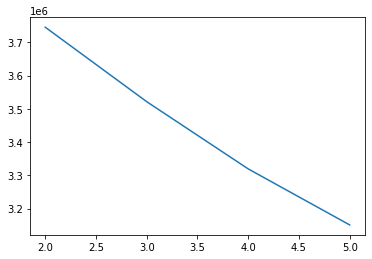

In [6]:
from IPython.display import clear_output
import matplotlib.pyplot as plt

inertias = []
max_n = 6
for inertia in find_cluster(features, max_n):
    inertias.append(inertia)
    clear_output()
    plt.plot(2+np.array(range(len(inertias))), inertias)
    plt.show()


In [7]:
from sklearn.decomposition import PCA

pca_2 = PCA(n_components=2)
features = pca_2.fit_transform(features)
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Cumulative variance explained by 2 principal components: 21.10%


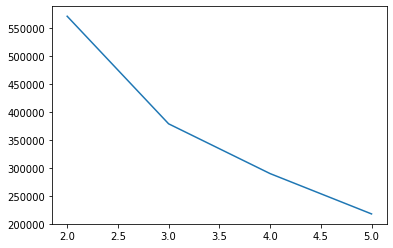

In [8]:
inertias = []
max_n = 6
for inertia in find_cluster(features, max_n):
    inertias.append(inertia)
    clear_output()
    plt.plot(2+np.array(range(len(inertias))), inertias)
    plt.show()


In [9]:
model = KMeans(n_clusters=3)
model.fit(features)

KMeans(n_clusters=3)

In [12]:
def load_images():
    for batch_file in batch_files:
        batch = joblib.load(os.path.join('predictions', batch_file))
        yield (batch['batch'], batch['prediction'])

In [ ]:
for i in range(model.n_clusters):
    os.mkdir('clusters/{}'.format(i))

In [19]:
import cv2
image_index = 1
for image_batch, features_batch in load_images():
    features = standard_scaler.transform(features_batch)
    features = pca_2.transform(features)
    y_s = model.predict(features)
    for image, y in zip(image_batch, y_s):
        cv2.imwrite('clusters/{}/{}.jpg'.format(y, image_index),image)
        image_index += 1